# 3. 인공지능과 가위바위보 하기 [프로젝트]

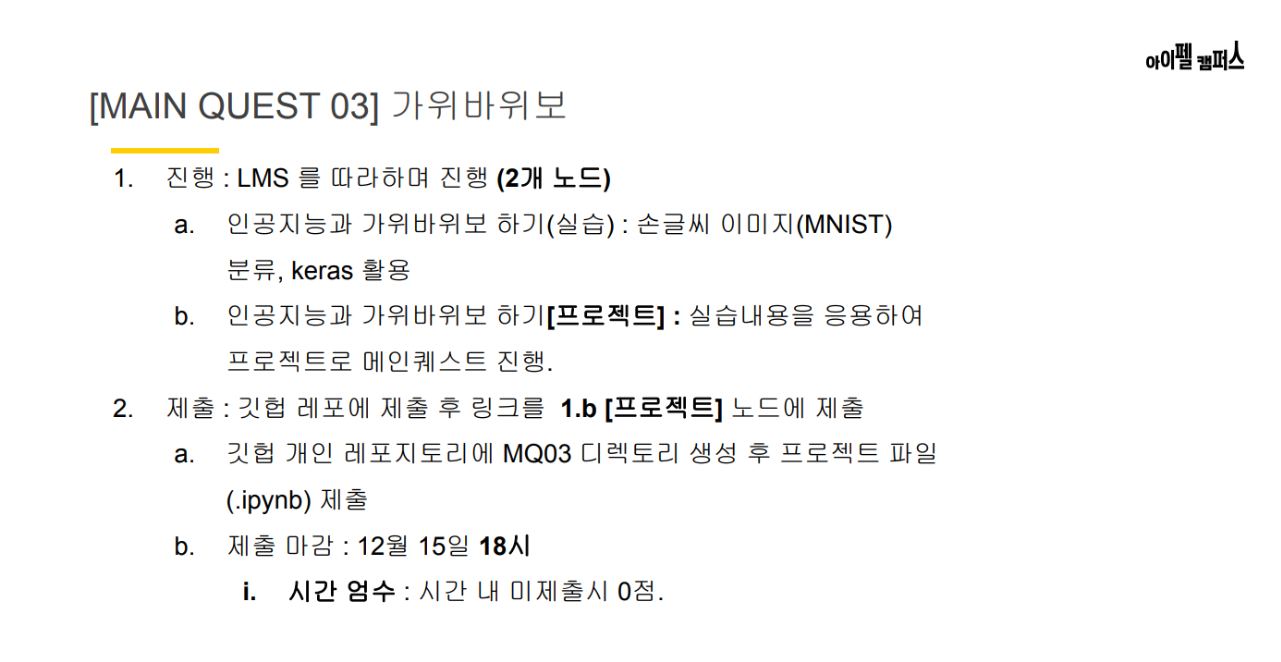
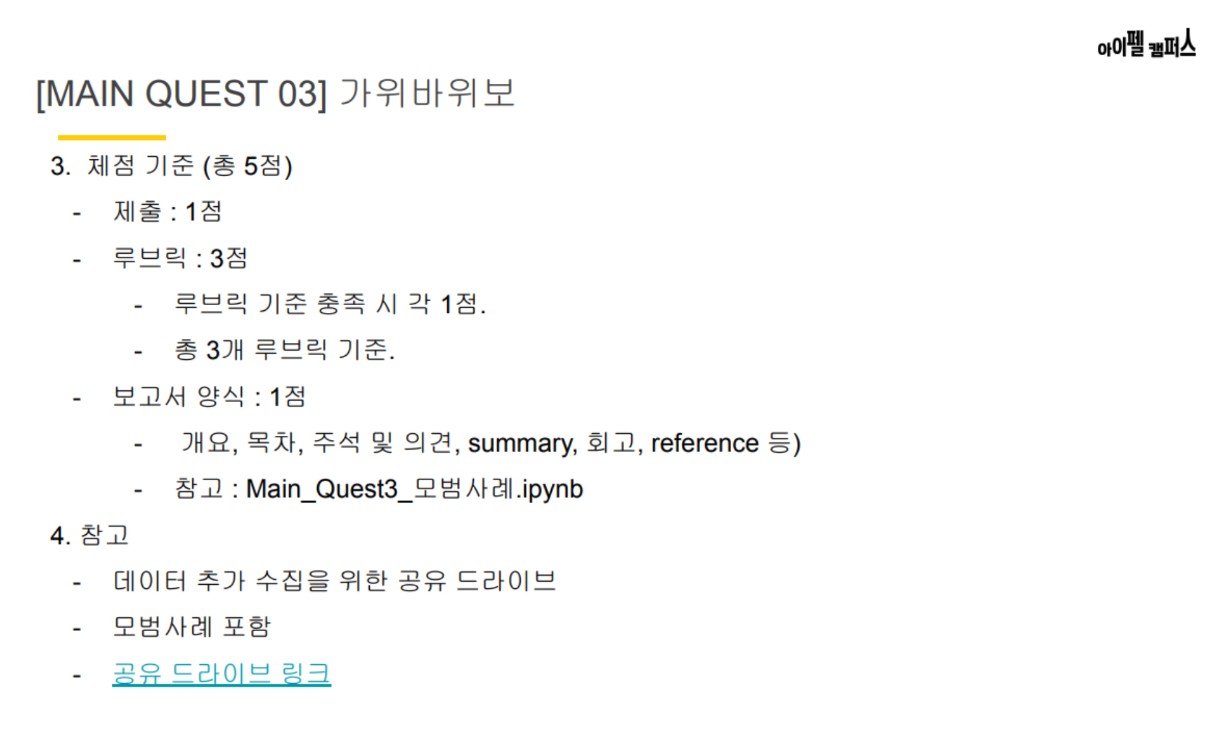
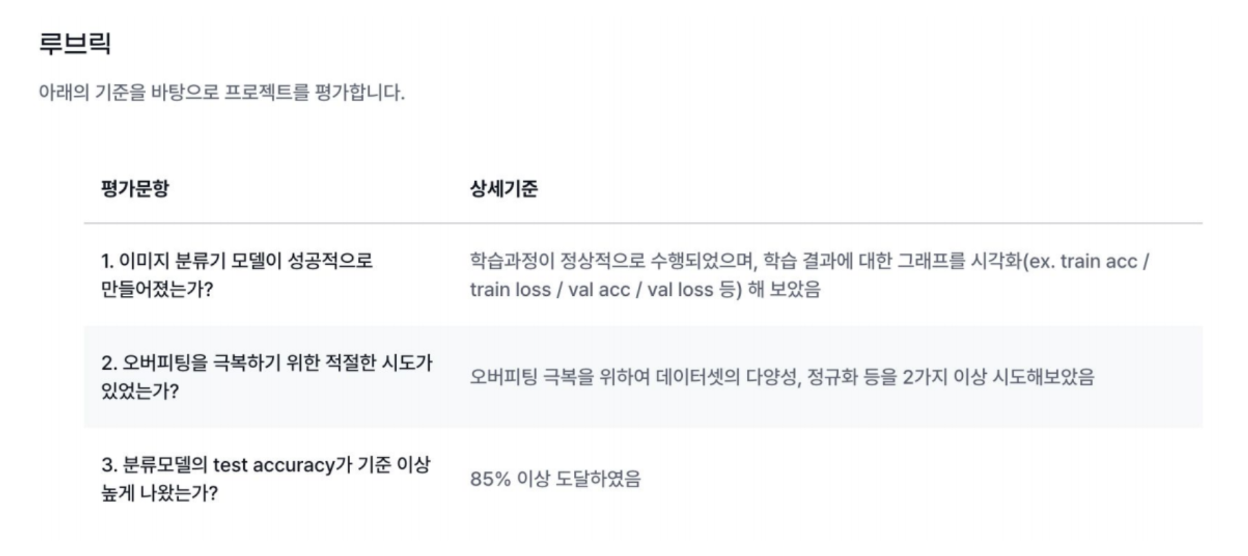

## **셀 번호 125번부터 참고하면 됩니다..!(하다 보니 커널도 끊겨서 많이 엉켰습니다 ㅠㅠ 그래서 오류가 난 부분이 좀 있습니다 ㅠㅠ)**

## 3-1. 미니 프로젝트: 가위바위보 분류기를 만들자

**라이브러리 버전을 확인해 보기**

사용한 라이브러리 버전을 둘러본다.

In [4]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


다운로드 받은 이미지의 크기: 224x224

**데이터 불러오기 + Resize 하기**

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 한다. 

이를 위해서는 PIL 라이브러리를 사용

In [5]:
# 라이브러리 불러오기
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [115]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1300  images to be resized.
1300  images resized.
가위 이미지 resize 완료!


In [116]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1300  images to be resized.
1300  images resized.


In [117]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1300  images to be resized.
1300  images resized.


# **!퍼실님 이 글 읽어주시기 바랍니다!**

처음에는 오류가 나지 않았으나.. 제가 훈련 데이터셋을 늘리고 나서 괜히 처음부터 돌려서 이 쪽 부분이 오류가 났습니다..
밑 부분부터는 문제가 없고, 성능 개선하는 곳부터부터는 오류가 없음을 알려드립니다. ㅠㅠ

In [118]:
# load_data()함수 만들기
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

IndexError: index 300 is out of bounds for axis 0 with size 300

라벨:  0


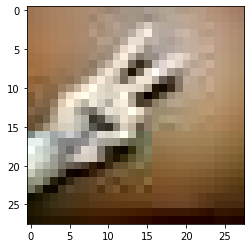

In [127]:
# 이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**딥러닝 네트워크 설계하기**

In [128]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
model.add(keras.layers.Dense(3, activation='softmax')) # 분류해야 하는 클래스 수 (가위, 바위, 보 - 총 3개)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

**딥러닝 네트워크 학습시키기**

In [129]:
# 모델 훈련
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
122/122 [==============================] - 3s 21ms/step - loss: 3.5428 - accuracy: 0.6115
Epoch 2/10
122/122 [==============================] - 2s 20ms/step - loss: 0.3229 - accuracy: 0.8823
Epoch 3/10
122/122 [==============================] - 2s 20ms/step - loss: 0.1775 - accuracy: 0.9356
Epoch 4/10
122/122 [==============================] - 2s 20ms/step - loss: 0.1109 - accuracy: 0.9633
Epoch 5/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0612 - accuracy: 0.9792
Epoch 6/10
122/122 [==============================] - 2s 20ms/step - loss: 0.0386 - accuracy: 0.9913
Epoch 7/10
122/122 [==============================] - 3s 20ms/step - loss: 0.0387 - accuracy: 0.9928
Epoch 8/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0174 - accuracy: 0.9982
Epoch 9/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0122 - accuracy: 0.9987
Epoch 10/10
122/122 [==============================] - 2s 20ms/step - loss: 0.0065 - accura

**테스트용 데이터 만들기**

In [24]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [25]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [26]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [29]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [134]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 6.4420 - accuracy: 0.4500
test_loss: 6.442009449005127
test_accuracy: 0.44999998807907104


**어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자**

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 손 동작이 되는 것이다.

In [135]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.33394593 0.6628564  0.00319776]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


model.predict() 결과가 벡터 형태로 나왔다. 이 벡터는 model이 추론한 결과가 각각 가위, 바위 보일 확률을 의미한다.

이 경우라면 model이 추론한 결과가 보일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 보라는 걸 아주 확신하고 있다는 뜻이 된다.

정말 보일까?

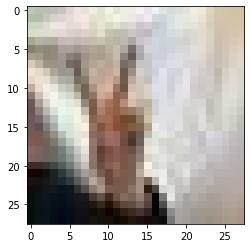

In [136]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [8.1185557e-05 8.7341785e-01 1.2650096e-01]
라벨: 2, 예측결과: 1


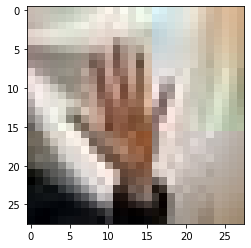

예측확률분포: [4.1398208e-11 7.4824230e-10 1.0000000e+00]
라벨: 0, 예측결과: 2


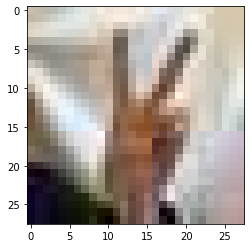

예측확률분포: [0.05758182 0.05625514 0.88616306]
라벨: 0, 예측결과: 2


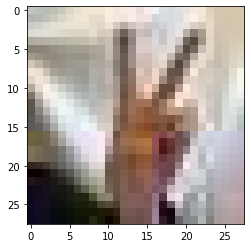

예측확률분포: [1.7543448e-08 1.0000000e+00 4.5721826e-08]
라벨: 2, 예측결과: 1


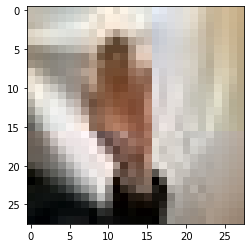

예측확률분포: [2.7855822e-09 9.9993873e-01 6.1218008e-05]
라벨: 0, 예측결과: 1


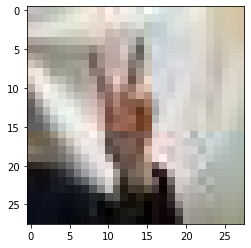

In [137]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다. model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나이다.

## 성능 높이기!

* 특징 수를 16 -> 32, 32 -> 64
* 뉴런 수를 늘림
* Dropout Layer 추가 (과적합을 줄이기 위함)

In [199]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3))) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax')) # 분류해야 하는 클래스 수(가위, 바위, 보 - 총 3개)

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               204928    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

In [139]:
from tensorflow.keras import optimizers

# 모델 컴파일
#adam = optimizers.Adam(lr = 0.001) # 학습률 조절
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 데이터 전처리 및 학습 과정에서 사용할 배치 크기 설정
# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 32, validation_split = 0.2, epochs=10, verbose = 2) # 배치 크기를 32로 설정 (조절 가능)

Epoch 1/10
98/98 - 4s - loss: 2.7531 - accuracy: 0.6340 - val_loss: 0.6914 - val_accuracy: 0.6628
Epoch 2/10
98/98 - 4s - loss: 0.3169 - accuracy: 0.8817 - val_loss: 0.2757 - val_accuracy: 0.8769
Epoch 3/10
98/98 - 4s - loss: 0.1683 - accuracy: 0.9349 - val_loss: 0.2993 - val_accuracy: 0.8718
Epoch 4/10
98/98 - 4s - loss: 0.1054 - accuracy: 0.9619 - val_loss: 0.1581 - val_accuracy: 0.9679
Epoch 5/10
98/98 - 4s - loss: 0.0592 - accuracy: 0.9798 - val_loss: 0.0536 - val_accuracy: 0.9936
Epoch 6/10
98/98 - 4s - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0924 - val_accuracy: 0.9474
Epoch 7/10
98/98 - 4s - loss: 0.0586 - accuracy: 0.9801 - val_loss: 0.0886 - val_accuracy: 0.9808
Epoch 8/10
98/98 - 4s - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0774 - val_accuracy: 0.9756
Epoch 9/10
98/98 - 4s - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0762 - val_accuracy: 0.9859
Epoch 10/10
98/98 - 4s - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.1274 - val_accuracy: 0.9538


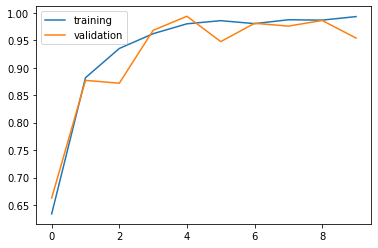

In [140]:
# 정확도 그래프로 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [141]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.6148 - accuracy: 0.6433
test_loss: 2.6148264408111572
test_accuracy: 0.6433333158493042


## **데이터셋 총 3900개**

In [142]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1300  images to be resized.
1300  images resized.
가위 이미지 resize 완료!


In [143]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1300  images to be resized.
1300  images resized.


In [144]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1300  images to be resized.
1300  images resized.


In [145]:
# load_data()함수 만들기
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 3900)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3900 입니다.
x_train shape: (3900, 28, 28, 3)
y_train shape: (3900,)


In [146]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 데이터 전처리 및 학습 과정에서 사용할 배치 크기 설정
# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 32, validation_split = 0.2, epochs=10, verbose = 2) #배치 크기를 32로 설정 (조절 가능)

Epoch 1/10
98/98 - 4s - loss: 0.0780 - accuracy: 0.9788 - val_loss: 0.2106 - val_accuracy: 0.9526
Epoch 2/10
98/98 - 4s - loss: 0.0604 - accuracy: 0.9782 - val_loss: 0.0740 - val_accuracy: 0.9872
Epoch 3/10
98/98 - 4s - loss: 0.0292 - accuracy: 0.9885 - val_loss: 0.2094 - val_accuracy: 0.9769
Epoch 4/10
98/98 - 4s - loss: 0.0208 - accuracy: 0.9949 - val_loss: 0.0737 - val_accuracy: 0.9821
Epoch 5/10
98/98 - 4s - loss: 0.0628 - accuracy: 0.9779 - val_loss: 0.2714 - val_accuracy: 0.9538
Epoch 6/10
98/98 - 4s - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1467 - val_accuracy: 0.9615
Epoch 7/10
98/98 - 4s - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0308 - val_accuracy: 0.9923
Epoch 8/10
98/98 - 4s - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.1121 - val_accuracy: 0.9795
Epoch 9/10
98/98 - 4s - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0726 - val_accuracy: 0.9897
Epoch 10/10
98/98 - 4s - loss: 0.0515 - accuracy: 0.9891 - val_loss: 0.0525 - val_accuracy: 0.9936


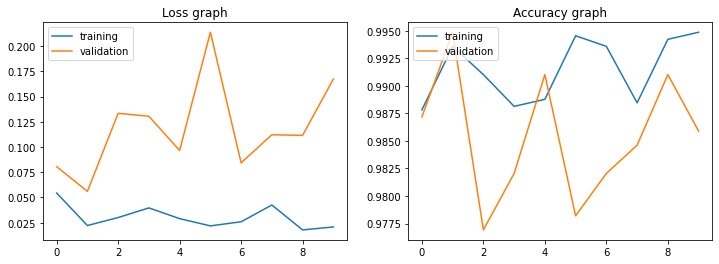

In [154]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [153]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 10.4404 - accuracy: 0.4900
test_loss: 10.440445899963379
test_accuracy: 0.49000000953674316


## **성능 개선을 위해 학습률과 배치 사이즈 조절**

배치 사이즈와 학습률을 조절하여 재학습한 후 테스트

In [159]:
from tensorflow.keras.optimizers import Adam

# 모델 컴파일
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer=adam,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
195/195 - 5s - loss: 0.0647 - accuracy: 0.9897 - val_loss: 1.4044 - val_accuracy: 0.9000
Epoch 2/10
195/195 - 4s - loss: 0.0622 - accuracy: 0.9897 - val_loss: 0.3133 - val_accuracy: 0.9782
Epoch 3/10
195/195 - 4s - loss: 0.0324 - accuracy: 0.9939 - val_loss: 0.3497 - val_accuracy: 0.9885
Epoch 4/10
195/195 - 4s - loss: 0.1927 - accuracy: 0.9785 - val_loss: 0.5588 - val_accuracy: 0.9487
Epoch 5/10
195/195 - 4s - loss: 0.0505 - accuracy: 0.9917 - val_loss: 0.1242 - val_accuracy: 0.9885
Epoch 6/10
195/195 - 4s - loss: 0.0383 - accuracy: 0.9933 - val_loss: 0.1752 - val_accuracy: 0.9833
Epoch 7/10
195/195 - 4s - loss: 0.0440 - accuracy: 0.9891 - val_loss: 0.4347 - val_accuracy: 0.9667
Epoch 8/10
195/195 - 4s - loss: 0.0229 - accuracy: 0.9952 - val_loss: 0.1876 - val_accuracy: 0.9859
Epoch 9/10
195/195 - 4s - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.3002 - val_accuracy: 0.9731
Epoch 10/10
195/195 - 4s - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.3973 - val_accuracy: 0.9795

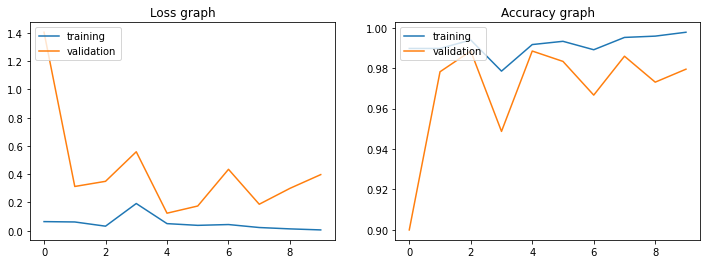

In [160]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [162]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 13.5217 - accuracy: 0.6167
test_loss: 13.521658897399902
test_accuracy: 0.6166666746139526


## **데이터 수 늘리기**

데이터 수가 아직도 부족한 것 같아서 더 늘려보았습니다. (총 5400개)

In [10]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1800  images to be resized.
1800  images resized.
가위 이미지 resize 완료!


In [11]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1800  images to be resized.
1800  images resized.


In [12]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1800  images to be resized.
1800  images resized.


In [28]:
# load_data()함수 만들기
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 5400)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5400 입니다.
x_train shape: (5400, 28, 28, 3)
y_train shape: (5400,)


In [167]:
# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
270/270 - 5s - loss: 0.5658 - accuracy: 0.8972 - val_loss: 0.1949 - val_accuracy: 0.9259
Epoch 2/10
270/270 - 5s - loss: 0.0810 - accuracy: 0.9771 - val_loss: 0.1921 - val_accuracy: 0.9315
Epoch 3/10
270/270 - 5s - loss: 0.0652 - accuracy: 0.9843 - val_loss: 0.1717 - val_accuracy: 0.9694
Epoch 4/10
270/270 - 5s - loss: 0.0780 - accuracy: 0.9782 - val_loss: 0.1637 - val_accuracy: 0.9630
Epoch 5/10
270/270 - 5s - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.1667 - val_accuracy: 0.9722
Epoch 6/10
270/270 - 6s - loss: 0.0319 - accuracy: 0.9921 - val_loss: 0.1869 - val_accuracy: 0.9685
Epoch 7/10
270/270 - 5s - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.1013 - val_accuracy: 0.9722
Epoch 8/10
270/270 - 5s - loss: 0.0589 - accuracy: 0.9829 - val_loss: 0.1766 - val_accuracy: 0.9731
Epoch 9/10
270/270 - 5s - loss: 0.0601 - accuracy: 0.9861 - val_loss: 0.0482 - val_accuracy: 0.9824
Epoch 10/10
270/270 - 5s - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.0572 - val_accuracy: 0.9778

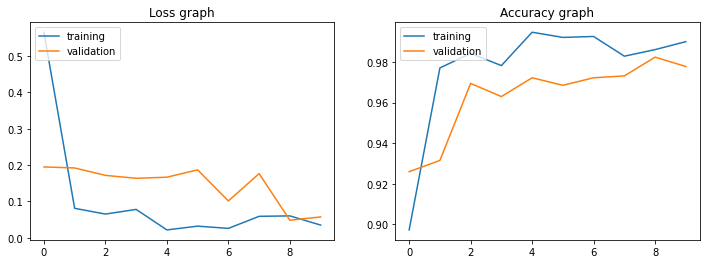

In [168]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [169]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 10.0926 - accuracy: 0.6600
test_loss: 10.092615127563477
test_accuracy: 0.6600000262260437


## **하이퍼파라미터를 다시 조절해보기 - 모델 재생성**

* 가중치 초기화
* 배치 정규화
* 드랍아웃
* stride 설정
* padding 추가(padding 매개변수는 입력 이미지 주변에 가상의 값(일반적으로 0)을 추가하여 출력의 크기를 조정하는 방법을 지정합니다. 이때 'same'으로 설정하면, 입력과 출력의 크기를 동일하게 유지하도록 입력 주변에 0으로 패딩을 추가합니다.
* 가중치 초기값(ReLU를 사용할 때 가중치 초깃값 - He 초깃값)

**블로그를 참고하여 모델을 복잡하게 만들어 보았다.**

In [2]:
from keras.layers import BatchNormalization, Dropout

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(3, activation='softmax')) # 0~9까지의 (총 10개) 분류해야 하는 클래스 수

# model.summary()
#from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))



model.summary()


NameError: name 'keras' is not defined

In [220]:
# 모델 컴파일
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
270/270 - 46s - loss: 0.6186 - accuracy: 0.7498 - val_loss: 0.5791 - val_accuracy: 0.7435
Epoch 2/10
270/270 - 45s - loss: 0.1889 - accuracy: 0.9315 - val_loss: 0.1736 - val_accuracy: 0.9546
Epoch 3/10
270/270 - 45s - loss: 0.0938 - accuracy: 0.9688 - val_loss: 2.6234 - val_accuracy: 0.5194
Epoch 4/10
270/270 - 45s - loss: 0.0438 - accuracy: 0.9870 - val_loss: 0.1085 - val_accuracy: 0.9657
Epoch 5/10
270/270 - 45s - loss: 0.0606 - accuracy: 0.9799 - val_loss: 0.0191 - val_accuracy: 0.9954
Epoch 6/10
270/270 - 45s - loss: 0.0187 - accuracy: 0.9933 - val_loss: 0.0503 - val_accuracy: 0.9806
Epoch 7/10
270/270 - 45s - loss: 0.0578 - accuracy: 0.9845 - val_loss: 0.1477 - val_accuracy: 0.9472
Epoch 8/10
270/270 - 45s - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0593 - val_accuracy: 0.9815
Epoch 9/10
270/270 - 45s - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 10/10
270/270 - 45s - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.1906 - val_accura

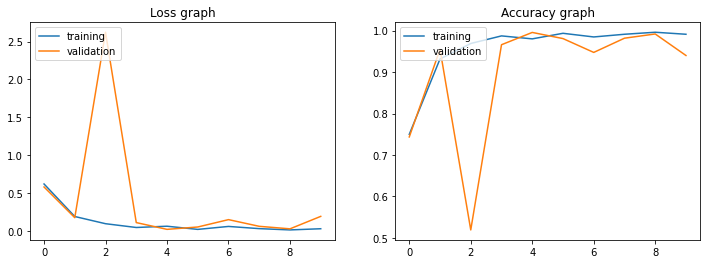

In [221]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [222]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 0.5618 - accuracy: 0.8233
test_loss: 0.5618253946304321
test_accuracy: 0.8233333230018616


In [224]:
# 모델 컴파일
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 32, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
135/135 - 45s - loss: 0.0260 - accuracy: 0.9928 - val_loss: 0.0337 - val_accuracy: 0.9935
Epoch 2/10
135/135 - 44s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0293 - val_accuracy: 0.9944
Epoch 3/10
135/135 - 44s - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0199 - val_accuracy: 0.9926
Epoch 4/10
135/135 - 44s - loss: 0.0077 - accuracy: 0.9981 - val_loss: 0.0331 - val_accuracy: 0.9935
Epoch 5/10
135/135 - 44s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0357 - val_accuracy: 0.9935
Epoch 6/10
135/135 - 44s - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.2243 - val_accuracy: 0.9565
Epoch 7/10
135/135 - 44s - loss: 0.0310 - accuracy: 0.9931 - val_loss: 0.0701 - val_accuracy: 0.9824
Epoch 8/10
135/135 - 44s - loss: 0.0151 - accuracy: 0.9942 - val_loss: 0.0543 - val_accuracy: 0.9926
Epoch 9/10
135/135 - 44s - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0123 - val_accuracy: 0.9944
Epoch 10/10
135/135 - 44s - loss: 0.0298 - accuracy: 0.9921 - val_loss: 0.0188 - val_accura

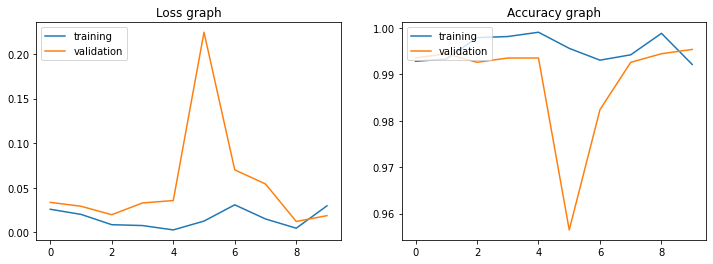

In [225]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [226]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 3.0711 - accuracy: 0.4767
test_loss: 3.0710513591766357
test_accuracy: 0.476666659116745


In [269]:
from keras.layers import BatchNormalization, Dropout

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(3, activation='softmax')) # 0~9까지의 (총 10개) 분류해야 하는 클래스 수

# model.summary()
#from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))

model.summary()


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_74 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_74 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_75 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_75 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 28, 28, 64)      

In [273]:
# 모델 컴파일
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 32, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
135/135 - 50s - loss: 0.1019 - accuracy: 0.9602 - val_loss: 0.0494 - val_accuracy: 0.9907
Epoch 2/10
135/135 - 49s - loss: 0.0922 - accuracy: 0.9646 - val_loss: 0.0320 - val_accuracy: 0.9954
Epoch 3/10
135/135 - 49s - loss: 0.1045 - accuracy: 0.9597 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 4/10


KeyboardInterrupt: 

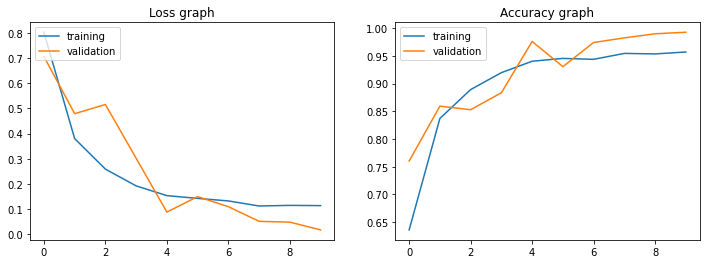

In [271]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [272]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 2.0289 - accuracy: 0.5767
test_loss: 2.0289361476898193
test_accuracy: 0.5766666531562805


In [286]:
from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 28, 28, 50)        1400      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_83 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
activation_83 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 14, 14, 50)        22550     
_________________________________________________________________
batch_normalization_84 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
activation_84 (Activation)   (None, 14, 14, 50)      

In [1]:
# 모델 컴파일
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=7, verbose = 2)

NameError: name 'optimizers' is not defined

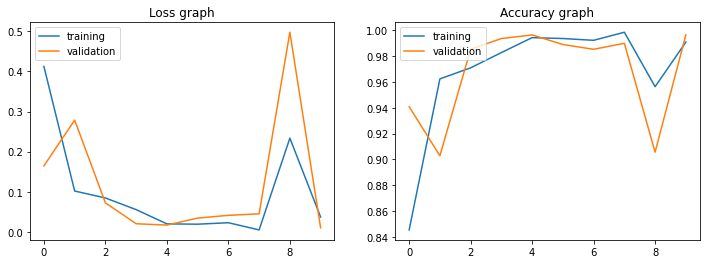

In [284]:
# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [285]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.8569 - accuracy: 0.6933
test_loss: 2.856867790222168
test_accuracy: 0.6933333277702332


In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 50)        1400      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 50)       

In [55]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# 모델 컴파일
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=10, verbose = 2)

Epoch 1/10
270/270 - 13s - loss: 0.6132 - accuracy: 0.7616 - val_loss: 0.3987 - val_accuracy: 0.8269
Epoch 2/10
270/270 - 12s - loss: 0.2130 - accuracy: 0.9231 - val_loss: 0.2556 - val_accuracy: 0.9259
Epoch 3/10
270/270 - 12s - loss: 0.1170 - accuracy: 0.9613 - val_loss: 0.1056 - val_accuracy: 0.9620
Epoch 4/10
270/270 - 12s - loss: 0.0809 - accuracy: 0.9734 - val_loss: 0.2979 - val_accuracy: 0.9120
Epoch 5/10
270/270 - 12s - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.0532 - val_accuracy: 0.9815
Epoch 6/10
270/270 - 12s - loss: 0.0612 - accuracy: 0.9789 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 7/10
270/270 - 12s - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.0376 - val_accuracy: 0.9870
Epoch 8/10
270/270 - 12s - loss: 0.0399 - accuracy: 0.9856 - val_loss: 0.0282 - val_accuracy: 0.9935
Epoch 9/10
270/270 - 12s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 10/10
270/270 - 12s - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0110 - val_accura

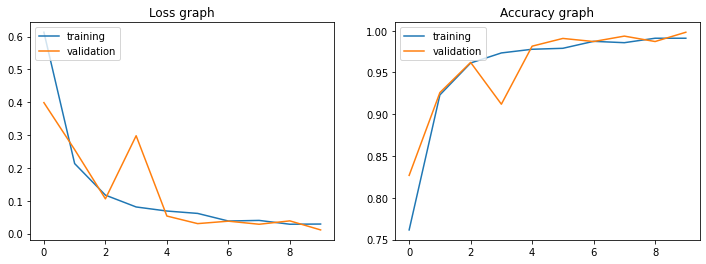

In [56]:
import matplotlib.pyplot as plt

# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [57]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.7493 - accuracy: 0.7933
test_loss: 0.7493204474449158
test_accuracy: 0.7933333516120911


## **레이어 추가 및 하이퍼파라미터 값 조절 후 - 83%**

In [105]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
activation_34 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_35 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_35 (Activation)   (None, 14, 14, 32)      

In [106]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# 모델 컴파일
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=8, verbose = 2)

Epoch 1/8
270/270 - 11s - loss: 0.7349 - accuracy: 0.7340 - val_loss: 0.6876 - val_accuracy: 0.7389
Epoch 2/8
270/270 - 10s - loss: 0.2594 - accuracy: 0.9028 - val_loss: 0.4481 - val_accuracy: 0.8639
Epoch 3/8
270/270 - 10s - loss: 0.1509 - accuracy: 0.9454 - val_loss: 0.2501 - val_accuracy: 0.8926
Epoch 4/8
270/270 - 10s - loss: 0.0915 - accuracy: 0.9660 - val_loss: 0.2853 - val_accuracy: 0.9213
Epoch 5/8
270/270 - 10s - loss: 0.0662 - accuracy: 0.9738 - val_loss: 0.2162 - val_accuracy: 0.9389
Epoch 6/8
270/270 - 10s - loss: 0.0677 - accuracy: 0.9738 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 7/8
270/270 - 10s - loss: 0.0498 - accuracy: 0.9822 - val_loss: 0.0363 - val_accuracy: 0.9907
Epoch 8/8
270/270 - 10s - loss: 0.0469 - accuracy: 0.9840 - val_loss: 0.1481 - val_accuracy: 0.9713


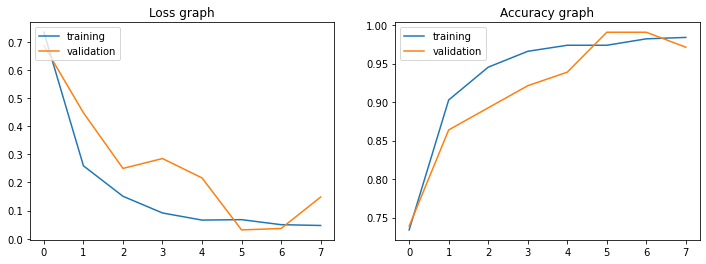

In [107]:
import matplotlib.pyplot as plt

# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [108]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.4465 - accuracy: 0.8333
test_loss: 0.4464608132839203
test_accuracy: 0.8333333134651184


## **하이퍼파라미터 값 조절 후 - 88%**

* dense를 128에서 64

In [125]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dropout

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(activation='relu', input_shape = (28,28,3), filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation = 'softmax', kernel_initializer='he_normal'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
activation_49 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_50 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_50 (Activation)   (None, 14, 14, 32)      

In [126]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# 모델 컴파일
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, batch_size = 16, validation_split = 0.2, epochs=8, verbose = 2)

Epoch 1/8
270/270 - 11s - loss: 0.7710 - accuracy: 0.6604 - val_loss: 1.4604 - val_accuracy: 0.3111
Epoch 2/8
270/270 - 10s - loss: 0.4069 - accuracy: 0.8236 - val_loss: 0.6493 - val_accuracy: 0.7056
Epoch 3/8
270/270 - 10s - loss: 0.2778 - accuracy: 0.8882 - val_loss: 0.6098 - val_accuracy: 0.7630
Epoch 4/8
270/270 - 10s - loss: 0.2175 - accuracy: 0.9234 - val_loss: 0.5552 - val_accuracy: 0.8250
Epoch 5/8
270/270 - 10s - loss: 0.1948 - accuracy: 0.9294 - val_loss: 0.1835 - val_accuracy: 0.9296
Epoch 6/8
270/270 - 10s - loss: 0.1606 - accuracy: 0.9470 - val_loss: 0.2264 - val_accuracy: 0.9407
Epoch 7/8
270/270 - 10s - loss: 0.1199 - accuracy: 0.9627 - val_loss: 0.2971 - val_accuracy: 0.9185
Epoch 8/8
270/270 - 10s - loss: 0.1386 - accuracy: 0.9560 - val_loss: 0.2118 - val_accuracy: 0.9500


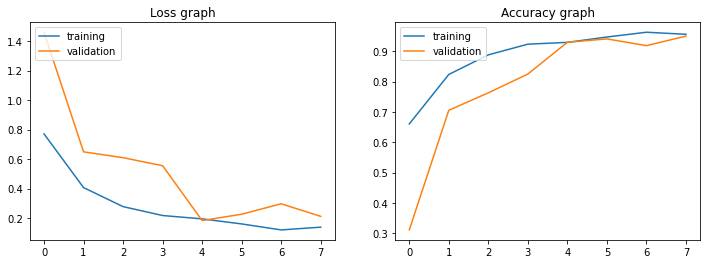

In [127]:
import matplotlib.pyplot as plt

# loss와 accuracy 그래프로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.legend(['training', 'validation'], loc = 'upper left')


plt.show()

In [128]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.5001 - accuracy: 0.8833
test_loss: 0.5000916719436646
test_accuracy: 0.8833333253860474


# 회고문

일단 딥러닝 쉽지 않다는 것을 깨달았습니다 ㅠㅠ 최대한 올린 정확도가 88%입니다.. 이것도 과적합인 건 아닌지 걱정이네요.. 좀 더 그래프를 보는 방법을 공부해야 할 것 같습니다.

**Keep:** 문제를 해결하기 위해서 다양한 시도를 해보았다.

**Try:** 문제 해결에만 집중하다 보니, 코드를 해석하는 것에는 집중을 하지 못 한 것 같아서 아쉽다. 코드도 좀 더 해석해보고, 다음부터는 코드에 대한 이해를 높이기 위해서 자세히 뜯어봐야겠다!

**Problem:** 아직 정확도를 높이기 위해서 무엇을 실행해야 하는지, 정확도를 높이기 위해 입력해야 하는 코드 구성을 잘 모르는 것 같다. 그 부분에 대해서는 좀 더 공부해야 할 것 같다.

## **Reference**

* https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/

* https://hogni.tistory.com/35

* https://meissa.tistory.com/10

* https://github.com/seulwithlove/aiffel_core_7th/tree/main/Main_quest_03